In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("GenZ_DatingApp_Data.csv")

In [3]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

In [4]:
data['Primary_App'] = data['Primary_App'].fillna(data['Primary_App'].mode()[0])

In [5]:
data['Secondary_Apps'] = data['Secondary_Apps'].fillna(data['Secondary_Apps'].mode()[0])

In [6]:
data['Challenges'] = data['Challenges'].fillna(data['Challenges'].mode()[0])

In [9]:
# Does gender influence dating app preferences 

# We'll try and respond to that question by providing more details on the dataset. Let's display a counts of gender categories 
gender_counts = data['Gender'].value_counts()
print(gender_counts)

Gender
Female        176
Male          171
Non-binary    153
Name: count, dtype: int64


In [28]:
pivot_table = data.pivot_table(index="Primary_App", columns="Gender", aggfunc="size", fill_value=0)
print(pivot_table)

Gender       Female  Male  Non-binary
Primary_App                          
Bumble           39    29          25
Hinge            35    29          42
OkCupid          79    85          61
Tinder           23    28          25


C:\Users\William Okwale\AppData\Local\Temp\ipykernel_3844\2641361394.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(index="Primary_App", columns="Gender", aggfunc="size", fill_value=0)


In [27]:
gender_summary = data.groupby("Gender")["Primary_App"].value_counts().unstack().fillna(0)
print(gender_summary)

Primary_App  Bumble  Hinge  OkCupid  Tinder
Gender                                     
Female           39     35       79      23
Male             29     29       85      28
Non-binary       25     42       61      25


C:\Users\William Okwale\AppData\Local\Temp\ipykernel_3844\971483686.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_summary = data.groupby("Gender")["Primary_App"].value_counts().unstack().fillna(0)


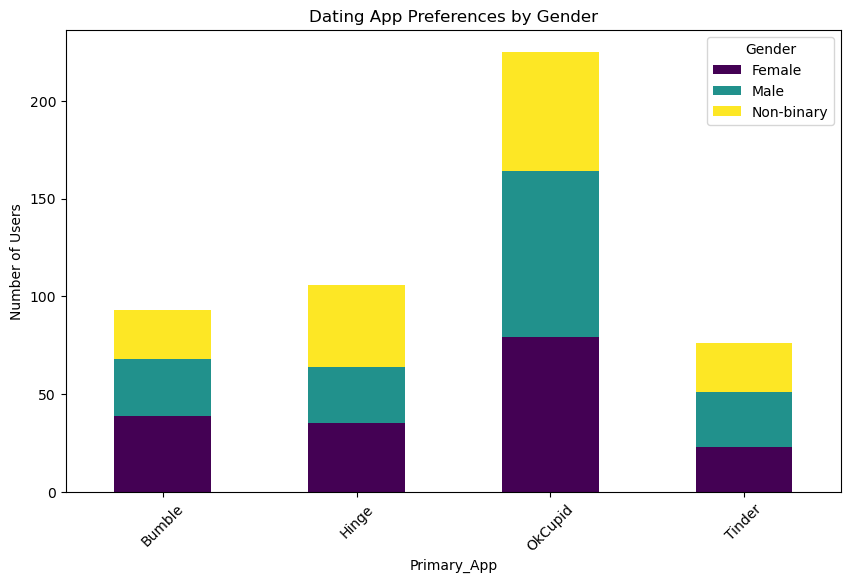

In [31]:
# This is a stacked bar showing the dating app preferences by gender

import matplotlib.pyplot as plt

app_counts.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.ylabel("Number of Users")
plt.title("Dating App Preferences by Gender")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

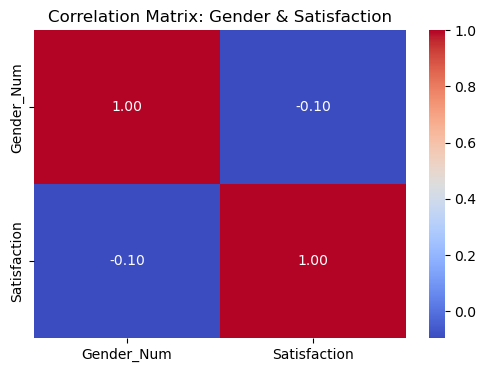

In [33]:
import seaborn as sns

data["Gender_Num"] = data["Gender"].astype("category").cat.codes

corr_matrix = data[["Gender_Num", "Satisfaction"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Gender & Satisfaction")
plt.show()

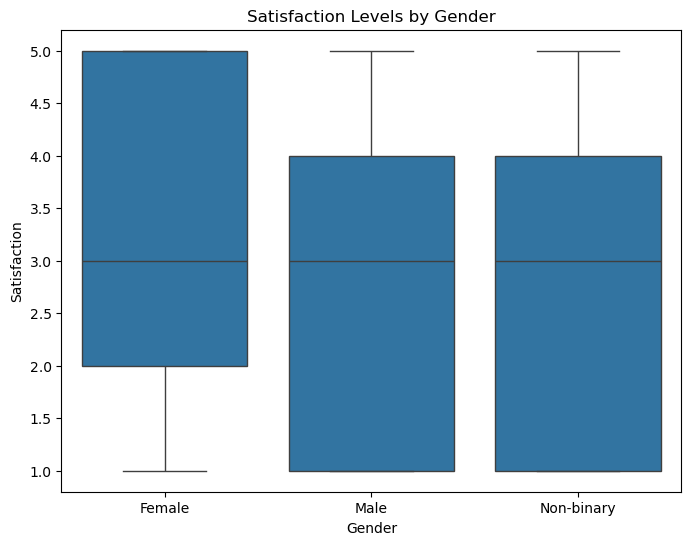

In [17]:
# This box plot provides more information regarding the level of satisfaction each gender is finding in using the dating apps

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='Satisfaction')
plt.title('Satisfaction Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Satisfaction')
plt.show()

<Figure size 1000x600 with 0 Axes>

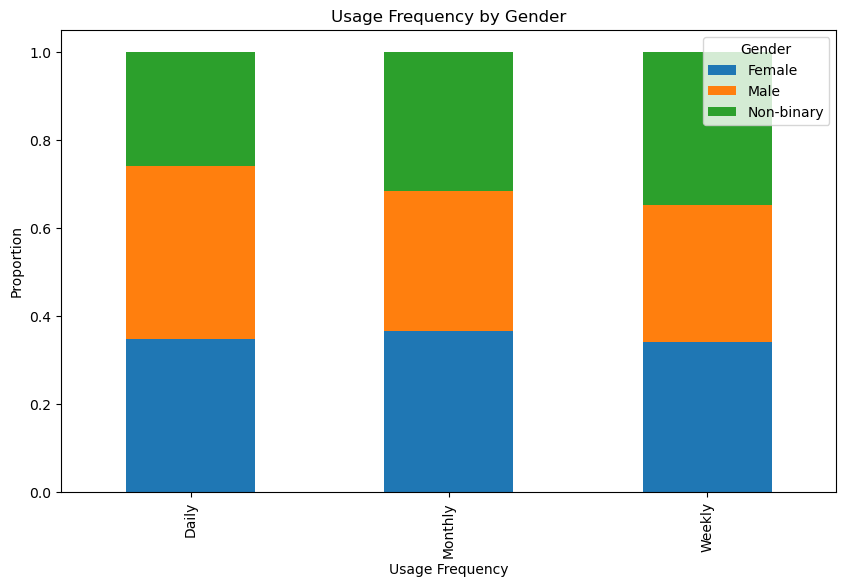

In [20]:
# The usage frequency by gender is displayed in the stacked bar plot below 

plt.figure(figsize=(10, 6))
usage_by_gender = pd.crosstab(data['Usage_Frequency'], data['Gender'], normalize='index')
usage_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Usage Frequency by Gender')
plt.xlabel('Usage Frequency')
plt.ylabel('Proportion')
plt.show()

In [35]:
# Are people using multiple dating apps simultaneously?

num_multiple_app_users = multiple_apps_users.shape[0]
total_users = data.shape[0]

print(f"Users with multiple apps: {num_multiple_app_users} out of {total_users} ({(num_multiple_app_users / total_users) * 100:.2f}%)")


Users with multiple apps: 500 out of 500 (100.00%)


In [37]:
# This code helps identify which secondary apps are most frequently used

secondary_app_counts = data["Secondary_Apps"].value_counts()
print(secondary_app_counts)

Secondary_Apps
Hinge      217
OkCupid     96
Bumble      95
Tinder      92
Name: count, dtype: int64


In [49]:
# Which age group is most active on dating apps?
age_usage_frequency = data.groupby(['Age', 'Usage_Frequency']).size().unstack(fill_value=0)
print(age_usage_frequency)

Usage_Frequency  Daily  Monthly  Weekly
Age                                    
18                  19       17      21
19                  23       22      22
20                  22       15      14
21                  16       23      22
22                  18       25      20
23                  28       19      26
24                  29       18      27
25                  26       19       9


C:\Users\William Okwale\AppData\Local\Temp\ipykernel_3844\3662212432.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_usage_frequency = data.groupby(['Age', 'Usage_Frequency']).size().unstack(fill_value=0)


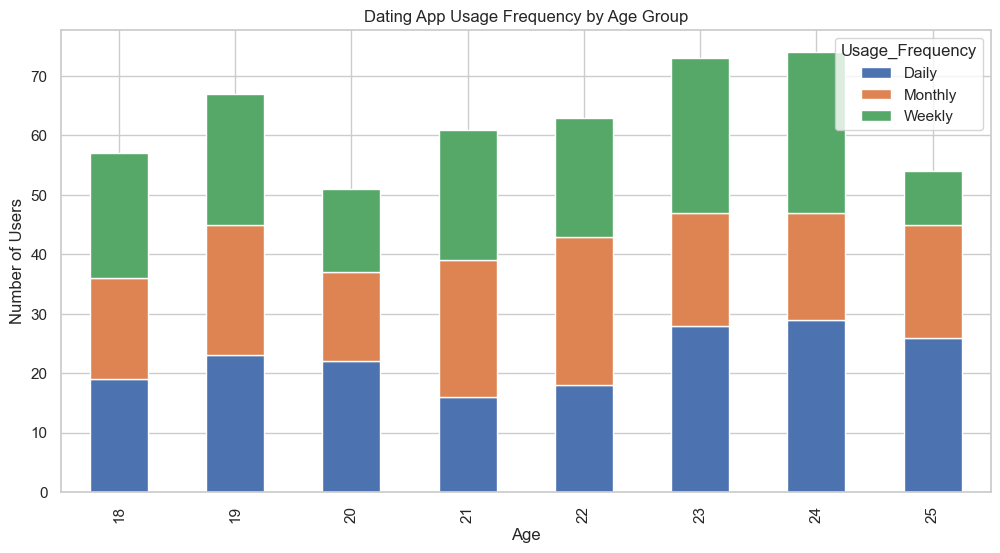

In [50]:
sns.set(style="whitegrid")

# Plot the data
age_usage_frequency.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Dating App Usage Frequency by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

In [51]:
age_activity = age_usage_frequency.sum(axis=1)
print(age_activity)

Age
18    57
19    67
20    51
21    61
22    63
23    73
24    74
25    54
dtype: int64


In [52]:
most_active_age_group = age_activity.idxmax()
print(f"The most active age group on dating apps is: {most_active_age_group}")

The most active age group on dating apps is: 24


In [53]:
# Do people in urban vs. rural areas show different usage patterns?
print(data["Location"].unique())

['Bangalore', 'Delhi', 'Kolkata', 'Mumbai', 'Chennai', 'Pune', 'Hyderabad']
Categories (7, object): ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']


In [56]:
usage_by_location = data.groupby("Location")["Usage_Frequency"].value_counts(normalize=True).unstack().map('{:.2f}%'.format)
print(usage_by_location)

Usage_Frequency  Daily Monthly Weekly
Location                             
Bangalore        0.42%   0.28%  0.30%
Chennai          0.35%   0.42%  0.23%
Delhi            0.41%   0.33%  0.26%
Hyderabad        0.28%   0.33%  0.39%
Kolkata          0.33%   0.29%  0.38%
Mumbai           0.39%   0.27%  0.34%
Pune             0.34%   0.31%  0.34%


C:\Users\William Okwale\AppData\Local\Temp\ipykernel_3844\432802075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_by_location = data.groupby("Location")["Usage_Frequency"].value_counts(normalize=True).unstack().map('{:.2f}%'.format)


In [57]:
usage_time_by_location = data.groupby("Location")["Daily_Usage_Time"].value_counts(normalize=True).unstack().map('{:.2f}%'.format)
print(usage_time_by_location)

Daily_Usage_Time 1 hour 1.5 hours 2 hours 3 hours 30 minutes
Location                                                    
Bangalore         0.22%     0.20%   0.20%   0.17%      0.20%
Chennai           0.18%     0.20%   0.21%   0.17%      0.24%
Delhi             0.16%     0.25%   0.20%   0.22%      0.17%
Hyderabad         0.16%     0.22%   0.25%   0.27%      0.11%
Kolkata           0.24%     0.18%   0.18%   0.18%      0.21%
Mumbai            0.16%     0.28%   0.20%   0.22%      0.15%
Pune              0.25%     0.18%   0.22%   0.19%      0.15%


C:\Users\William Okwale\AppData\Local\Temp\ipykernel_3844\2531490070.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_time_by_location = data.groupby("Location")["Daily_Usage_Time"].value_counts(normalize=True).unstack().map('{:.2f}%'.format)
